# Exercise 6.2 - Exploring Relationships

# Step 1 - Set Up Visualization Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.1'

In [35]:
path = "C:/Users/kenwh/Achievement 6"

In [36]:
# Import Data from Exercise 6.1
Path = "C:/Users/kenwh/Achievement 6"

In [4]:
df = pd.read_csv(os.path.join(Path, 'Data', 'Prepared Data', 'cleaned_data.cvc'))

In [5]:
# Check for mixed data types
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

# No mixed data types

C:\Users\kenwh\AppData\Local\Temp\ipykernel_17244\3107379642.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\kenwh\AppData\Local\Temp\ipykernel_17244\3107379642.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\kenwh\AppData\Local\Temp\ipykernel_17244\3107379642.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\kenwh\AppData\Local\Temp\ipykernel_17244\3107379642.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\kenwh\AppData\Local\Temp\ipykernel_17244\3107379642.py:3: F

# Exploring Relationships

# Correlations

In [6]:
print(df.columns)

Index(['Unnamed: 0', 'Age', 'Gender', 'Body Mass Index', 'Number of Children',
       'Smoker', 'Region of USA', 'Expenses'],
      dtype='object')


In [7]:
df_numeric = df.drop(columns=['Unnamed: 0','Gender', 'Smoker', 'Region of USA'])
correlation_matrix = df_numeric.corr()

In [8]:
# Create a correlation matrix using pandas

df_numeric.corr()

Age  Body Mass Index  Number of Children  Expenses
Age                 1.000000         0.109344            0.041536  0.298308
Body Mass Index     0.109344         1.000000            0.012755  0.198401
Number of Children  0.041536         0.012755            1.000000  0.067389
Expenses            0.298308         0.198401            0.067389  1.000000

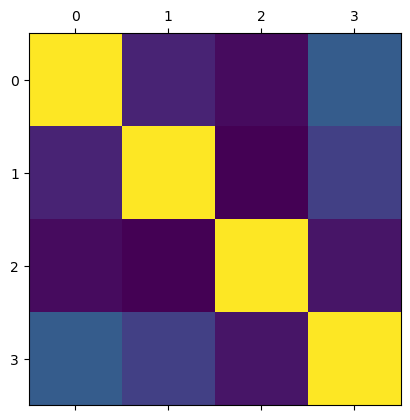

In [9]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_numeric.corr())
plt.show()

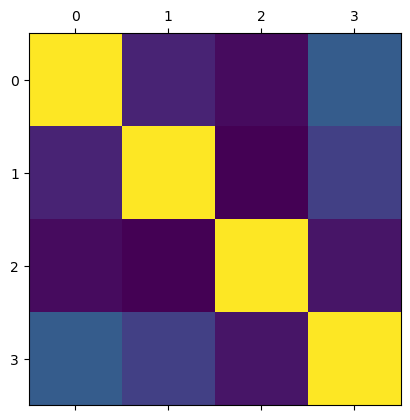

In [10]:
# Save figure
plt.matshow(df_numeric.corr())
plt.savefig("out.png") 

In [11]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\kenwh\\Achievement 6\\Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

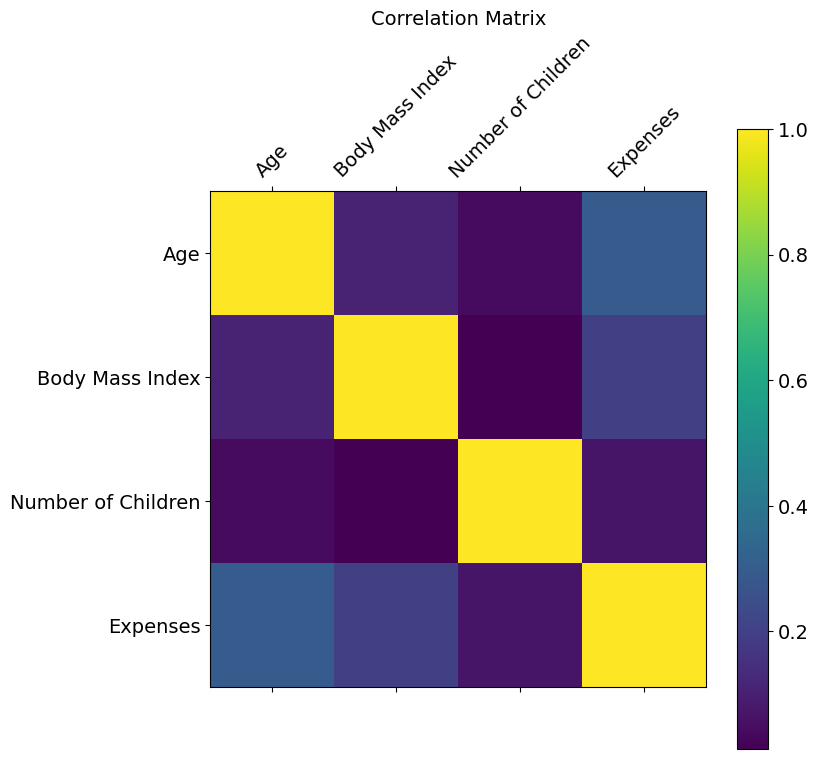

In [12]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_numeric.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

# Create a correlation heatmap using seaborn

In [13]:
df_numeric.columns

Index(['Age', 'Body Mass Index', 'Number of Children', 'Expenses'], dtype='object')

In [14]:
sub = df_numeric[['Age', 'Body Mass Index', 'Number of Children', 'Expenses']]

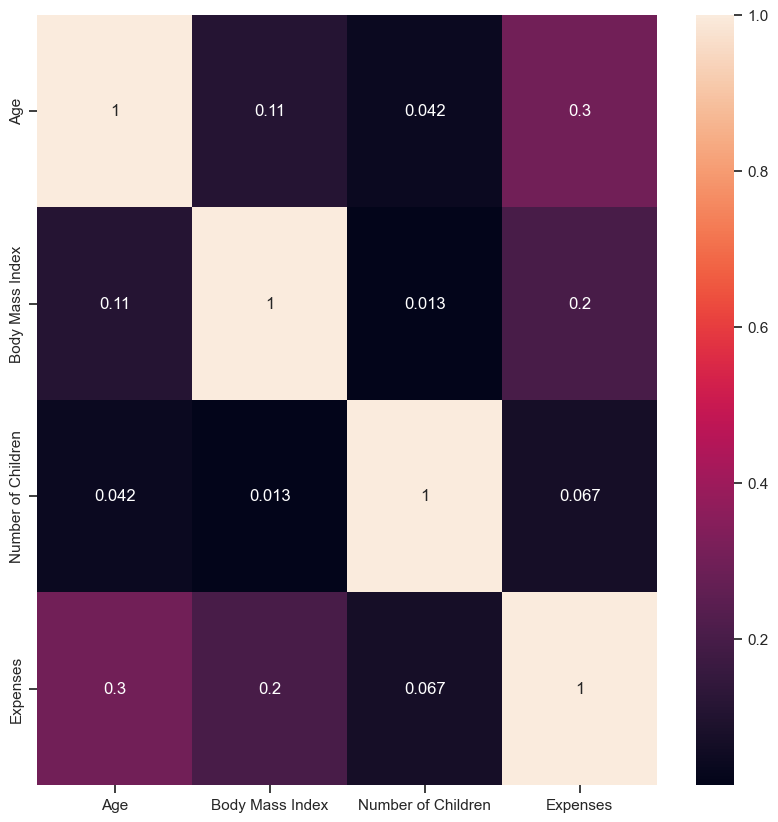

In [42]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#Save correlation heatmap
plt.savefig(os.path.join(path, 'Visualizations', 'correlations.png'))

Explanation

As you can see from this chart, the overall correlation values of most of the different categories are low. Our highest correlation is a .3 between age and expenses. There also are no negative correlations. I would have expected to see more of a correlation between number of children and expenses, as well as number of children and age, as I would assume that the older someone gets they are more of a health risk and more likely to have children. 
 

In [37]:
plt.savefig(os.path.join(path, 'Visualizations', 'correlations.png'))

<Figure size 640x480 with 0 Axes>

# Scatterplots

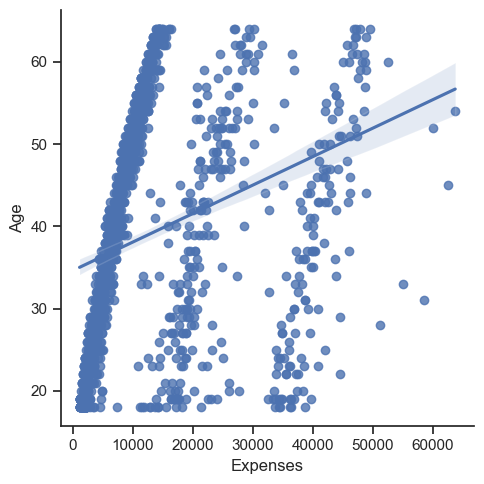

In [43]:
# Create a scatterplot for the "Expenses" and "Age" columns in seaborn

sns.lmplot(x = 'Expenses', y = 'Age', data = df_numeric)

# save scatter plot
plt.savefig(os.path.join(path, 'Visualizations', 'scatterplot_age_expenses.png'))

Explanation of scatterplot

The scatterplot of expenses and age shows that there are almost three distinct trend lines. One starts with close to zero expenses at age 18 (youngest in the set) and goes up to around 12,000 when you are 60. Another one starts and goes up to t around 15,000 at age 18 and goes up to just below 30,000. The last one starts at around 35,000 and goes up to 45,000 by the time you reach 60+. This shoes that as you get older your expenses increase, but only a small amount, and that overall starting expenses at 18 have a major role in determining your future expenses. More analysis should be done to see why this is the case, and to confirm that this trend is accurate.

C:\Users\kenwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kenwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kenwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kenwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

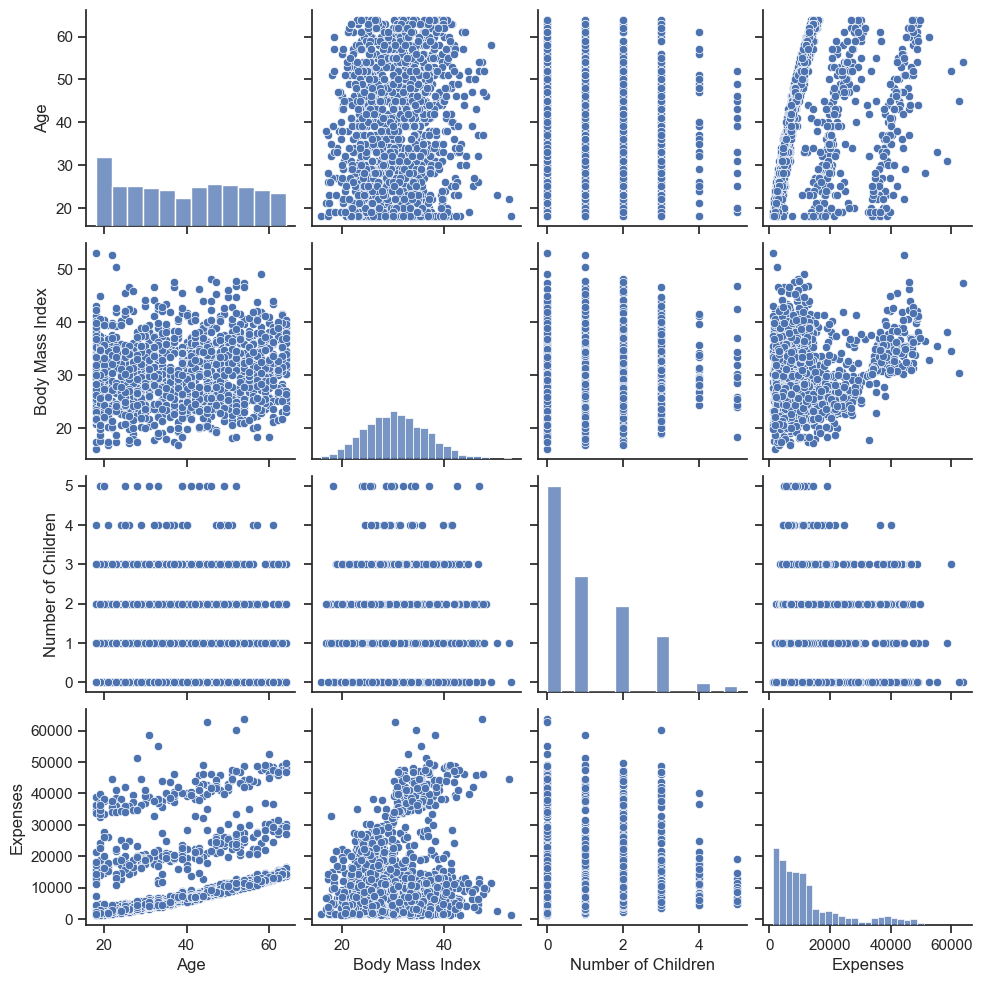

In [44]:
# Create a pair plot 

g = sns.pairplot(sub)

# Save pair plot
plt.savefig(os.path.join(path, 'Visualizations', 'pair_plot.png'))

Based of these plots, you can clearly see the limited correlation between BMI and Expenses and BMI and age. I would like to explore farther why this is the case. Additionally, I would like to look at how the number of children and age/expenses are all connected.

# Categorical Plots

C:\Users\kenwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


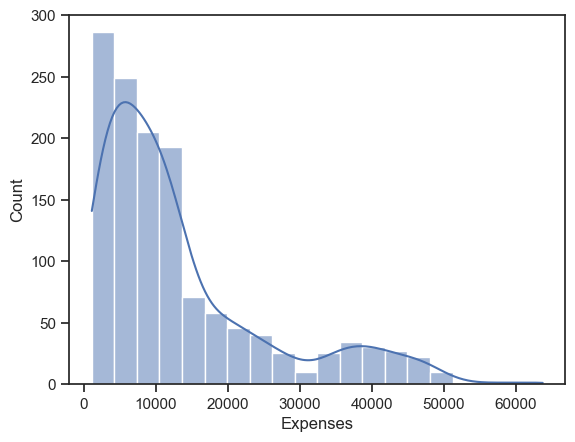

In [45]:
# Use a histogram to visualize the distribution of the variables. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_numeric['Expenses'], bins = 20, kde = True)

# Save histogram
plt.savefig(os.path.join(path, 'Visualizations', 'histogram_expenses.png'))

In [19]:
df_numeric.loc[df_numeric['Expenses'] < 15000, 'Expense Category'] = 'Low Expense'

In [20]:
df_numeric.loc[(df_numeric['Expenses'] >= 15000) & (df_numeric['Expenses'] < 30000),  'Expense Category'] = 'Mid Expense'

In [21]:
df_numeric.loc[df_numeric['Expenses'] >= 30000, 'Expense Category'] = 'High Expense'

In [22]:
df_numeric['Expense Category'].value_counts(dropna = False)

Expense Category
Low Expense     979
Mid Expense     196
High Expense    162
Name: count, dtype: int64

In [23]:
df_numeric.columns

Index(['Age', 'Body Mass Index', 'Number of Children', 'Expenses',
       'Expense Category'],
      dtype='object')

C:\Users\kenwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kenwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


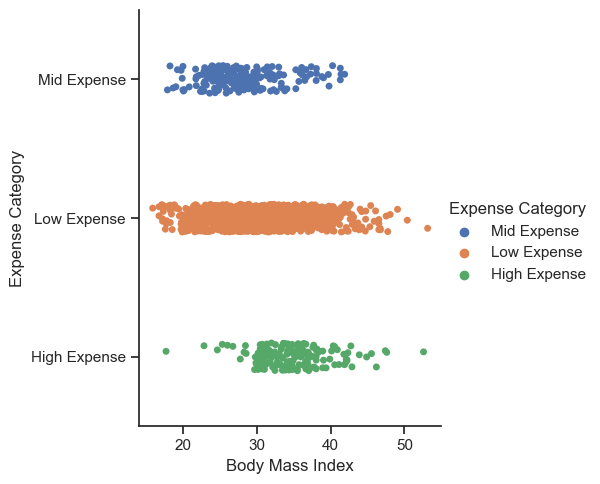

In [46]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Body Mass Index", y="Expense Category", hue="Expense Category", data=df_numeric)

# Save categorical plot
plt.savefig(os.path.join(path, 'Visualizations', 'categorical_plot_expenses.png'))

This chart shows that the most people have low expenses. It also shows that almost no one wiht a low BMI has high expenses. The biggest cluster of middle expenses have a bmi between 25 to 35, while the biggest cluster for high expense is between 30-40. 

# Exporting Pictures and Data Frames

In [25]:
df_numeric.to_csv(os.path.join(Path,'Data','Prepared data','numeric_data.cvc'))